# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I bought a return trip with...
1,✅ Trip Verified | Poor from start to finish. ...
2,✅ Trip Verified | Communication and customer s...
3,✅ Trip Verified | That was supposed to be my ...
4,✅ Trip Verified | Have no fear when your BA f...


In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


In [53]:
df = pd.read_csv("data/BA_reviews.csv", index_col=0)

In [54]:
df

,reviews
0,✅ Trip Verified | I bought a return trip with...
1,✅ Trip Verified | Poor from start to finish. ...
2,✅ Trip Verified | Communication and customer s...
3,✅ Trip Verified | That was supposed to be my ...
4,✅ Trip Verified | Have no fear when your BA f...
...,...
995,✅ Trip Verified | Rome to London. One of the ...
996,✅ Trip Verified | Cologne to Gatwick in econo...
997,✅ Trip Verified | Tampa to Gatwick. I paid to...
998,✅ Trip Verified | London Heathrow to Madrid. I...


In [91]:
df.isnull().value_counts()

reviews  verified  corpus
False    False     False     1000
Name: count, dtype: int64

In [55]:
df["verified"] = df["reviews"].str.contains("Trip Verified")

In [79]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
special_chars = re.compile(r'[^\w\s]', re.I|re.A)
lem = WordNetLemmatizer()

reviews_data = df["reviews"].str.replace("Trip Verified", " ") # Remove the "Trip Verified" text
reviews_data = reviews_data.str.replace("Not Verified", " ") #  Remove the "Not Verified" text

corpus = []

for text in reviews_data:
    text = special_chars.sub('', text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    words = nltk.word_tokenize(text)

    words = [word for word in words if word not in stop_words]

    words = [lem.lemmatize(word) for word in words]
    
    text = " ".join(words)
    corpus.append(text)

In [80]:
df  = df.drop('corpus', axis=1)

In [82]:
df["corpus"] = corpus

In [83]:
df

,reviews,verified,corpus
0,✅ Trip Verified | I bought a return trip with...,True,bought return trip ba webjet australia last ye...
1,✅ Trip Verified | Poor from start to finish. ...,True,poor start finish six month purchasing ticket ...
2,✅ Trip Verified | Communication and customer s...,True,communication customer service non existent ma...
3,✅ Trip Verified | That was supposed to be my ...,True,supposed flight cancelled 12 hour takeoff near...
4,✅ Trip Verified | Have no fear when your BA f...,True,fear ba flight operated finnair business class...
...,...,...,...
995,✅ Trip Verified | Rome to London. One of the ...,True,rome london one best european airline travel s...
996,✅ Trip Verified | Cologne to Gatwick in econo...,True,cologne gatwick economy class silver status ba...
997,✅ Trip Verified | Tampa to Gatwick. I paid to...,True,tampa gatwick paid seat bumped business class ...
998,✅ Trip Verified | London Heathrow to Madrid. I...,True,london heathrow madrid travel lhr regularly br...


In [85]:
df.shape

(1000, 3)

In [56]:
df["verified"].value_counts()


verified
True     769
False    231
Name: count, dtype: int64

(-0.5, 399.5, 399.5, -0.5)

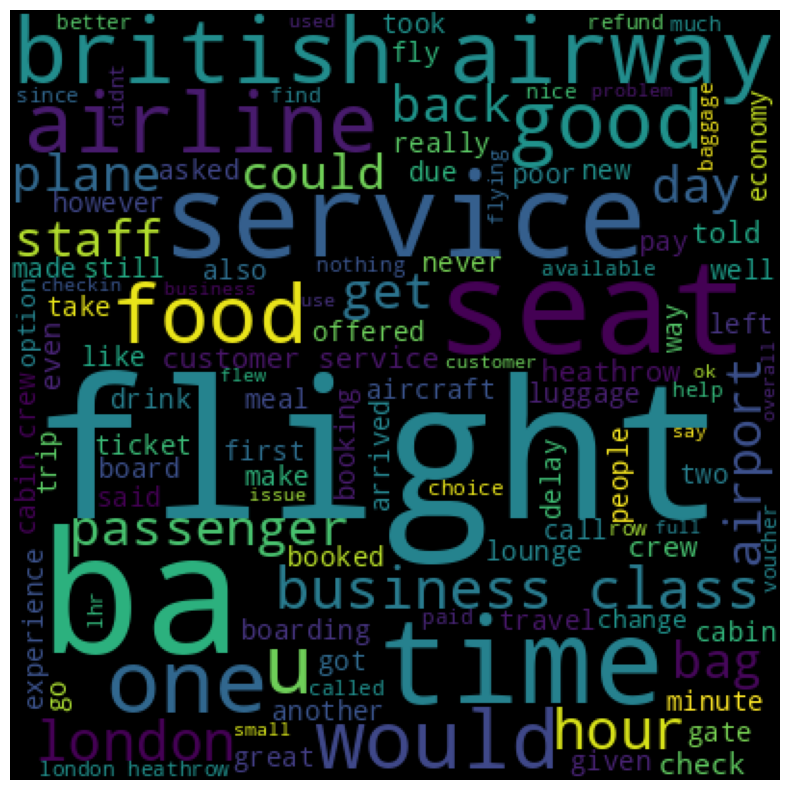

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 400, height = 400, 
                max_words = 500,
                stopwords = stop_words, 
                max_font_size = 100,
                min_font_size = 10).generate(' '.join(df.corpus))

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 


In [89]:
from collections import Counter

# Split each sentence in 'corpus' into words and count the frequency of each word
word_freq = Counter(word for sentence in corpus for word in sentence.split())

# Print the frequency of each word in descending order
for word, freq in word_freq.most_common():
    print(f'{word}: {freq}')

flight: 2157
ba: 1243
seat: 852
service: 776
time: 631
hour: 573
london: 535
airline: 464
crew: 444
food: 441
class: 440
british: 438
airway: 435
one: 433
good: 428
business: 400
u: 398
staff: 394
cabin: 379
would: 377
get: 372
customer: 358
day: 318
heathrow: 313
passenger: 299
back: 298
bag: 272
even: 271
airport: 270
told: 263
check: 260
could: 259
economy: 256
boarding: 256
first: 254
plane: 250
experience: 248
meal: 230
drink: 226
minute: 226
return: 208
lounge: 208
club: 208
fly: 204
luggage: 201
cancelled: 199
got: 192
new: 192
2: 189
never: 188
booked: 187
call: 178
aircraft: 178
still: 175
due: 174
another: 173
two: 173
also: 172
ticket: 171
delayed: 168
arrived: 163
really: 163
make: 162
like: 162
made: 159
gate: 159
well: 157
3: 157
late: 153
refund: 150
people: 150
next: 147
offered: 145
much: 145
year: 144
full: 144
travel: 143
great: 141
took: 141
way: 140
baggage: 139
delay: 138
given: 138
said: 138
flying: 137
long: 137
however: 137
board: 135
premium: 135
trip: 133
ask

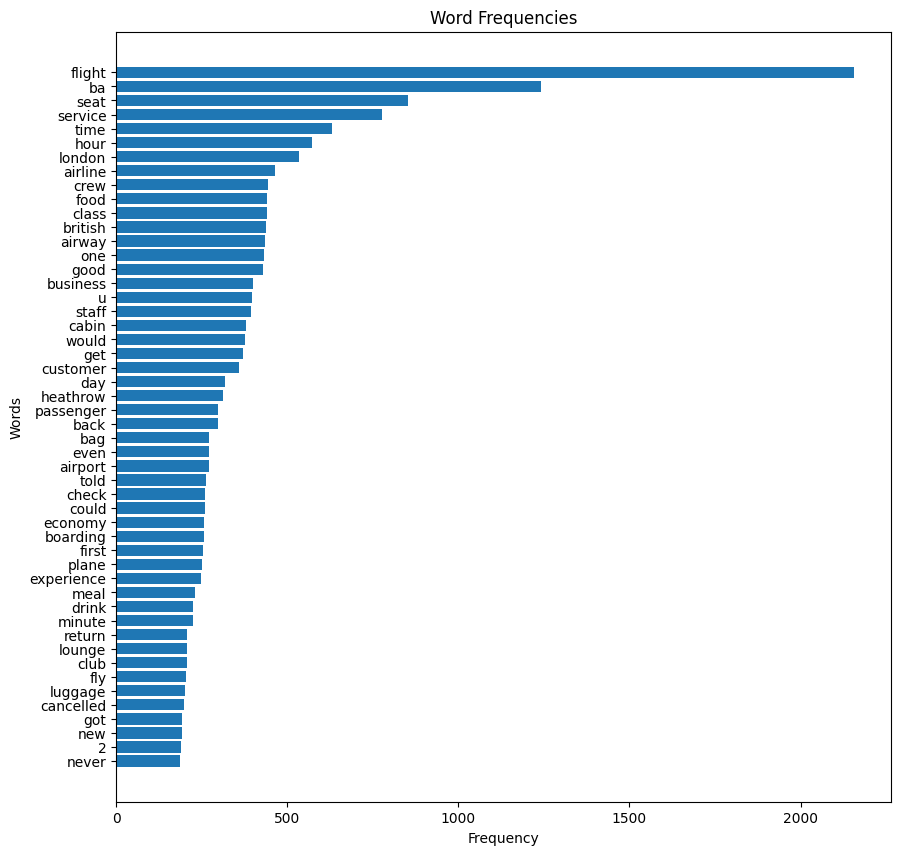

In [113]:


# Get the 10 most common words
common_words = word_freq.most_common(50)

# Unzip the word-frequency pairs into two lists
words, frequencies = zip(*common_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 10))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequencies')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency at the top
plt.show()